### 기본 라이브러리 임포트

분석에 필요한 다양한 라이브러리를 로드한다.
라이브러리 로드 시 주어진 alias 조건에 맞게 로드해야 한다.
없는 라이브러리는 `!pip install`로 설치한다.

In [50]:
#pandas: 표 형태의 데이터를 다루기 위한 python 데이터 분석 라이브러리
import pandas as pd

#numpy: 수치 계산과 행렬 연산을 빠르게 처리하는 과학 계산 라이브러리
import numpy as np

#seaborn: 통계적 데이터 시각화를 간편하게 그릴 수 있는 시각화 라이브러리
!pip install seaborn
import seaborn as sns

#scikit-learn: 머신러닝 모델 학습, 평가, 예측 등을 지원하는 대표적인 ML 라이브러리
import sklearn as sk

#matplotlib: 다양한 형태의 그래프와 시각화를 그릴 수 있는 python 기본 시각화 라이브러리
import matplotlib.pyplot as plt

### 데이터 불러오기

주어진 변수명에 맞게 `pandas` 패키지를 활용해 데이터 프레임을 로드한다.

In [77]:
# 1. 데이터 불러오기

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

### 데이터 탐색하기

행, 열, 데이터 프레임 정보, 통계 정보 등을 확인한다.

- `.head(n)`: 앞행 n개 확인 (default: 5)
- `.tail(n)`: 뒷행 n개 확인 (default: 5)
- `.columns`: 데이터 프레임 열 이름 확인
- `.shape`: 데이터 프레임 행, 열 개수 확인
- `.info()`: 열 정보, Null 개수, 열 타입, 사이즈 등의 데이터 프레임 정보 확인
- `.describe()`: 계산 가능한 값(수치형 변수)에 대한 통계 정보 확인
- `.isnull()`: Null인 데이터 확인
    - `sum()`과 함게 사용되어 행이나 열별로의 Null 개수를 세기 위해 주로 사용한다.
- `.value_counts()`: 범주형 변수에 대해 각 범주별 빈도수 확인
    - `normalize=True`를 주면 정규화된 값으로 범주별 비율을 확인할 수 있다.
- `.select_dtypes()`: 원하는 데이터 타입에 해당하는 열만 데이터 프레임 형태로 확인

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [59]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [60]:
df.shape

(891, 12)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [65]:
df.select_dtypes(int)

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


### 데이터 전처리

#### 데이터 프레임 제거

`.drop()`: 선택 열 제거

- 리스트 형태로 여러 개의 열을 한 번에 제거할 수 있다.
- `axis`: 행(=0)과 열(=1)을 주어 원하는 방향으로 제거할 수 있다.
- `inplace = True`: 변수를 할당하지 않고 바로 적용할 수 있다. 

In [66]:
df.drop(axis=0, inplace=True, index=0)

#### 데이터 프레임 변환

`.replace()`: 값 변경

원하는 값으로 변경하기 위해 사용하며 결측값 대체나 범주형 변수를 라벨링할 때 사용한다.

- `to_replace`: 주로 `{'바꾸고자 하는 값': '바뀌는 값'}`의 딕셔너리 형태로 주어진다.
- `inplace = True`: 변수를 할당하지 않고 바로 적용할 수 있다.

In [79]:
# 2. 범주형 → 숫자로 변환 (성별만 간단히 처리)
# 성별 'male' → 0, 'female' → 1로 변환
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

/var/folders/70/l808w3hj0vq59thqmp6735bc0000gn/T/ipykernel_10524/1641096659.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})


`fillna()`: 결측값 대체

- `inplace = True`: 변수를 할당하지 않고 바로 적용할 수 있다.

In [80]:
# 3. 결측값 간단 처리 (나이 평균으로 채우기)
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fare 결측값이 있다면 0으로 채우기
df['Fare'] = df['Fare'].fillna(0)

`.astype()`: 데이터 프레임 열 타입 변환

`astype`은 바꾸고자 하는 열에 할당해주어야 변환 값이 적용된다.

In [72]:
# Pclass 컬럼을 정수형으로 변환
df['Pclass'] = df['Pclass'].astype(int)

### 그룹 집계

`.groupby()`: 그룹별 집계 함수

집계 함수에 맞게 그룹별로 원하는 열을 집계할 수 있다.

- `by`: 그룹의 기준이 되는 열로 여러 열을 기준으로도 할 수 있다.
- `as_index = bool`: 그룹 기준 열을 인덱스화 할지 여부를 선택할 수 있다.
- 집계함수: `sum`(합), `mean`(평균), `count`(개수) 둥의 집계 함수

In [ ]:
# Pclass(등급)별 평균 나이 계산
df.groupby('Pclass')['Age'].mean()

# Sex(성별) 생존률 평균
df.groupby('Sex')['Survived'].mean()

# Pclass(등급)별 생존률 평균
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242857
Name: Survived, dtype: float64

### 정규화/표준화 (스케일링)

**정규화/표준화**는 각 변수 간의 측정단위 및 범위가 달라 값을 특정 값 사이로 변화해 비교가 가능할 수 있도록 하는 과정이다.

특히 거리를 기준으로 하는 모델에서는 꼭 필요한 과정이다.

정규화/표준화에는 다양한 방식이 있지만 Associate에는 주로 **Min Max Scale**이 나온다고 한다.

Min Max Scale은 `sklearn`의 `MinMaxScaler`를 사용하여 적용한다.

`MinMaxScaler`를 사용하기 위해서는 로드하는 과정이 필요하다.

- `fit`: 기준이 되는 데이터를 기반으로 스케일러 값을 맞춘다.
- `transform`: 기준 값을 기반으로 스케일링을 적용한다. 

In [81]:
# 4. 입력(X), 타겟(y) 정의
X = df[['Pclass', 'Sex', 'Age', 'Fare']] # 피처 선택
y = df['Survived'] # 생존 여부가 타겟

In [83]:
# 5. train/test 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [84]:
# import
from sklearn.preprocessing import MinMaxScaler

# 객체 생성
mms = MinMaxScaler()

# 스케일링 적용
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

### 인코딩

인코딩은 문자열이나 범주형으로 된 변수를 수치화 하는 과정으로, 문자열이 모델링 과정에서 해석되지 않기 때문에 필요한 과정이다.

#### 라벨 인코딩 Label Encoding

`LabelEncoder`를 사용하기 위해서는 로드하는 과정이 필요하다.

- `fit`: 기준이 되는 데이터를 기반으로 인코더 값을 맞춘다.
- `transform`: 기준 값을 기반으로 인코딩을 적용한다.

In [87]:
#import
from sklearn.preprocessing import LabelEncoder

#객체 생성
le = LabelEncoder()

#인코딩 적용
df['Sex'] = le.fit_transform(df['Sex'])

#### 원-핫 인코딩 One-Hot Encoding

원핫 인코딩(One-Hot Encoding)은 범주형 값을 0과 1로 이루어진 **벡터로 분리해서 표현**하는 방법이다.

`.get_dummies()`: 원-핫 인코딩은 `pandas`내의 메소드로 적용한다.

- `columns`: 원-핫 인코딩을 적용할 열 리스트
- `drop_first=True`: 첫번째 범주는 제외하고 원-핫 인코딩 적용

In [89]:
# 다시 불러서 초기화
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# 결측값 채우기
df['Embarked'] = df['Embarked'].fillna('S')

# 원핫 인코딩
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], prefix=['Sex', 'Embarked'])

# 확인
print(df_encoded.columns)  # 원하는 컬럼 있는지 확인


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


### 모델링 및 성능 평가

#### 데이터 분할 train_test_split()

적합한 모델을 생성하기 위해서는 과적합(과대적합/과소적합)을 피하기 위해 검증하는 과정이 필요하다. 이를 위해서는 데이터를 학습을 위한 **학습용 데이터**와 **검증용 데이터**로 분할한다.

데이터 분할에는 `skelarn`의 `train_test_split`을 사용한다.

`train_test_split()`: train_test_split를 사용하기 위해서는 로드하는 과정이 필요하다.

- X_train, X_test, y_train, y_test 순으로 분할한 데이터 값을 반환한다.
- `train_size/test_size`: 학습용/검증용 데이터를 분할할 기준이 된다. (주로 8:2나 7:3으로 분할한다.)
- `stratify`: 타겟 변수의 불균형이 심할 때 범주를 균형있게 분할 해준다.
- `random_state`: 랜덤 시드를 줌으로써 매번 같은 결과가 나올 수 있도록 설정한다.

In [90]:
# import
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify=y, random_state=42)

### 모델 학습

`fit()`: 생성된 모델을 학습용 데이터를 기반으로 **학습**한다.

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [93]:
# 모델 학습
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 모델 검증

`score()`: 생성된 모델의 성능을 **평가**한다.

분류 모델은 정확도로, 회귀 모델은 결정계수로 검증한다.

In [94]:
# 모델 검증

model.score(X_test, y_test)

0.7932960893854749

### 모델 예측

`predict()`: 생성된 모델로 데이터의 **예측값**을 계산한다.

In [95]:
# 모델 예측

model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

### 모델 검증 지표

모델 검증에 사용되는 지표도 모델에 따라 달라진다.

- **회귀 모델**: `MSE`, `RMSE`, `MAE`, ...
- **분류 모델**: `Accuracy`, `Precision`, `Recall`, `F1 Score`, ...

모델 평가 지표는 `sklearn`의 함수들을 사용하여 계산할 수 있다.
평가 지표를 계산할 때, (Actual, Precision)으로 입력 값을 주는 겂이 좋다.

In [96]:
# import
from sklearn.metrics import * # 모든 함수 로드

# 분류 모델 평가 지표
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 재현율
from sklearn.metrics import f1_score # F1 점수
from sklearn.metrics import confusion_matrix # 혼동 행렬
from sklearn.metrics import accuracy_score # 모든 지표 한번에

# 회귀 모델 평가 지표
from sklearn.metrics import r2_score # R2 결정계수
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE

### Confusion Matrix Heatmap으로 시각화 하기

[[94 16]
 [21 48]]


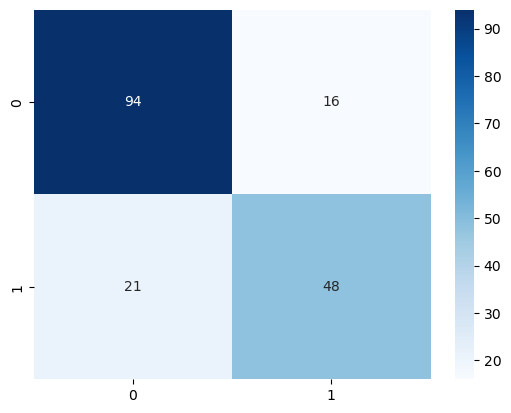

In [98]:
y_pred = model.predict(X_test) # 모델 예측값 저장
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix) # 혼동 행렬

# 히트맵으로 시각화
sns.heatmap(cf_matrix, # 혼동 행렬
           annot=True, # 숫자 표시
           fmt='d', # 정수형으로 표시
           cmap='Blues', # 색상맵
           xticklabels=model.classes_, # x축 레이블
           yticklabels=model.classes_, # y축 레이블
)

plt.show()

### 머신러닝 모델링

타겟 변수 y가 수치형이냐 범주형이냐에 따라 분류/회귀 문제가 달라진다. 해당 부분을 꼭 확인해서 맞는 모델을 사용해야 한다.

#### Logistic Regression

`LogisticRegression`: **Logistic Regression**을 사용하기 위해서는 로드하는 과정이 필요하다.

- **C**: 규제 강도
- **max_iter**: 반복 횟수

In [101]:
# import
from sklearn.linear_model import LogisticRegression

# 모델 생성
lg = LogisticRegression(C=1.0, max_iter=1000)

# 모델 학습
lg.fit(X_train, y_train)

# 모델 평가
lg.score(X_test, y_test)

0.7932960893854749

#### Decision Tree (의사결정 나무, 분류/회귀)

`DecisionTreeClassifier / DecisionTreeRegressor`: **Decision Tree**를 사용하기 위해서는 로드하는 과정이 필요하다.

- **max_depth**: 트리 깊이
- **random_state**: 랜덤 시드

In [102]:
# import
from sklearn.tree import DecisionTreeClassifier # 분류
from sklearn.tree import DecisionTreeRegressor # 회귀

# 모델 생성
dt = DecisionTreeClassifier(max_depth=5, random_state=2025)

# 모델 학습
dt.fit(X_train, y_train)

# 모델 평가
dt.score(X_test, y_test)

0.7653631284916201

#### Random Forest (랜덤 포레스트, 분류/회귀)

`RandomForestClassifier / RandomForestRegressor`: **Random Forest**를 사용하기 위해서는 로드하는 과정이 필요하다.

- **n_estimators**: 사용하는 트리 개수
- **random_state**: 랜덤 시드

In [103]:
# import
from sklearn.ensemble import RandomForestClassifier # 분류
from sklearn.ensemble import RandomForestRegressor # 회귀

# 모델 생성
rf = RandomForestClassifier(n_estimators=100, random_state=2025)

# 모델 학습
rf.fit(X_train, y_train)

# 모델 평가
rf.score(X_test, y_test)

0.8268156424581006

#### XGBoost (분류/회귀)

`XGBClassifier / XGBRegressor`를 사용하기 위해서는 설치 및 로드하는 과정이 필요하다.

- **n_estimators**: 사용하는 트리 개수

In [104]:
# install
!pip install xgboost

# import
from xgboost import XGBClassifier # 분류
from xgboost import XGBRegressor # 회귀

# 모델 생성
xgb = XGBClassifier(n_estimators=100)

# 모델 학습
xgb.fit(X_train, y_train)

# 모델 평가
xgb.score(X_test, y_test)

0.7932960893854749

#### Light GBM (분류/회귀)

`LGBMClassifier / LGBMRegressor`을 사용하기 위해서는 설치 및 로드하는 과정이 필요하다.

- `n_estimators`: 사용하는 트리 개수

In [106]:
# install
!pip install lightgbm

# import
from lightgbm import LGBMClassifier # 분류
from lightgbm import LGBMRegressor # 회귀

# 모델 생성
lgbm = LGBMClassifier(n_estimators=100)

# 모델 학습
lgbm.fit(X_train, y_train)

# 모델 평가
lgbm.score(X_test, y_test)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

0.8044692737430168

### 딥러닝 모델링

딥러닝은 `tensorflow`를 활용하여 모델링한다. 가이드에 맞게 모델을 생성하는 것이 중요하다.

In [2]:
# import
import tensorflow as tf
from tensorflow import keras

#### 모델 생성

주로 Sequential한 방법으로 레이어를 쌓는 문제가 나온다고 한다.

In [3]:
# import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 모델 생성
model = Sequential()

# 모델 구조
model.add(Dense(128, input_shape=(26,), activation='relu'))
model.add(Dropout(.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.3))

# output layer의 unit 수는 타겟 변수의 범주 개수와 동일하다.
model.add(Dense(1, activation='sigmoid'))

# 모델 요약
model.summary()

/opt/anaconda3/envs/ai310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,825 (54.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 0 (0.00 B)

#### 모델 학습

`compile`: 딥러닝은 머신러닝과 달리 모델링 과정에서 **컴파일**이 필요하다.

- `optimizer`: 모델링을 최적화하는 방법, 주로 **Adam**을 사용한다.
- `loss`: 손실함수 - 타겟변수에 맞는 손실함수를 사용해야 한다.
    - 회귀: mse
    - 이진분류: binary_crossentropy
    - 다중분류: sparse_categorical_crossentropy, categorical_crossentropy
- `metrics`: 모니터링 지표로, 사용자 정의 함수를 사용할 수 있다.
    - 회귀: mse, rmse
    - 분류: accuracy

In [4]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### EarlyStopping

모델의 과대 적합을 방지하기 위해 학습이 개선되지 않는다면 학습을 종료시킨다.

- `monitor`: 학습되는지 확인하는 기준
- `mode`: 모델 최적화의 기준 - 최대화/최소화
- `patience`: 모델 성능이 개선되지 않을 때 지켜보는 횟수

In [5]:
# import
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min')

#### ModelCheckpoint

모델을 학습하는 과정에서 일정한 간격으로 모델의 가중치를 저장하며 최적 모델을 선택한다.

- `filepath`: 모델 저장 경로
- `monitor`: 모니터링하는 지표
- `mode`: 모델 최적화의 기준 - 최대화/최소화
- `verbose`: 정보 표시 정도(0, 1, 2)
- `save_best_only=True`: 가장 좋은 성능의 모델만 저장

In [7]:
# import
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('my_checkpoint.keras',
                     save_best_only=True,
                     monitor='val_loss',
                     mode='min')

#### fit

모델을 학습한다.

- `validation_data`: 검증용 데이터
    - 종속변수와 타겟변수의 쌍으로 입력해야 한다.
- `epochs`: 학습 반복 횟수
- `batch_size`: 학습 시 한 번에 학습하는 데이터 사이즈
- `callbacks`: EarlyStopping, ModelCheckpoint와 같은 학습 과정에서 호출되는 함수

#### history

모델 학습 과정에서 모델 학습 결과를 젖아함으로써 학습 과정의 변화를 확인할 수 있다.
history는 딕셔너리 형태로 저장되어 key 값으로 접근할 수 있다.

- `loss`: 학습 loss
- `val_loss`: 검증 loss
- `accuracy`: 학습 accuracy
- `val_accuracy`: 검증 accuracy